In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully")


Libraries imported successfully


In [3]:
# Load the dataset
df = pd.read_csv('../data/raw/Articles.csv', encoding='latin-1')

print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nTotal Articles: {len(df):,}")
print(f"Columns: {list(df.columns)}")
print(f"\nDataset Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

DATASET OVERVIEW

Total Articles: 2,692
Columns: ['Article', 'Date', 'Heading', 'NewsType']

Dataset Shape: (2692, 4)
Memory Usage: 5.34 MB


"""
Cell 4: Missing Values Analysis
"""

In [5]:
"""
Cell 4: Missing Values Analysis
"""
print("\n" + "="*60)
print("MISSING VALUES")
print("="*60)

missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Percentage': missing_percent.values
})

print(missing_df)

# Visualize missing values only if there are any
if missing.sum() > 0:
    plt.figure(figsize=(10, 5))
    missing_df[missing_df['Missing Count'] > 0].plot(
        x='Column', 
        y='Percentage', 
        kind='bar', 
        legend=False,
        color='coral'
    )
    plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage (%)')
    plt.xlabel('Column')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No missing values found! Dataset is clean.")


MISSING VALUES
     Column  Missing Count  Percentage
0   Article              0         0.0
1      Date              0         0.0
2   Heading              0         0.0
3  NewsType              0         0.0

✅ No missing values found! Dataset is clean.



NEWS TYPE DISTRIBUTION
NewsType
sports      1408
business    1284
Name: count, dtype: int64

Percentage distribution:
NewsType
sports      52.3
business    47.7
Name: count, dtype: float64


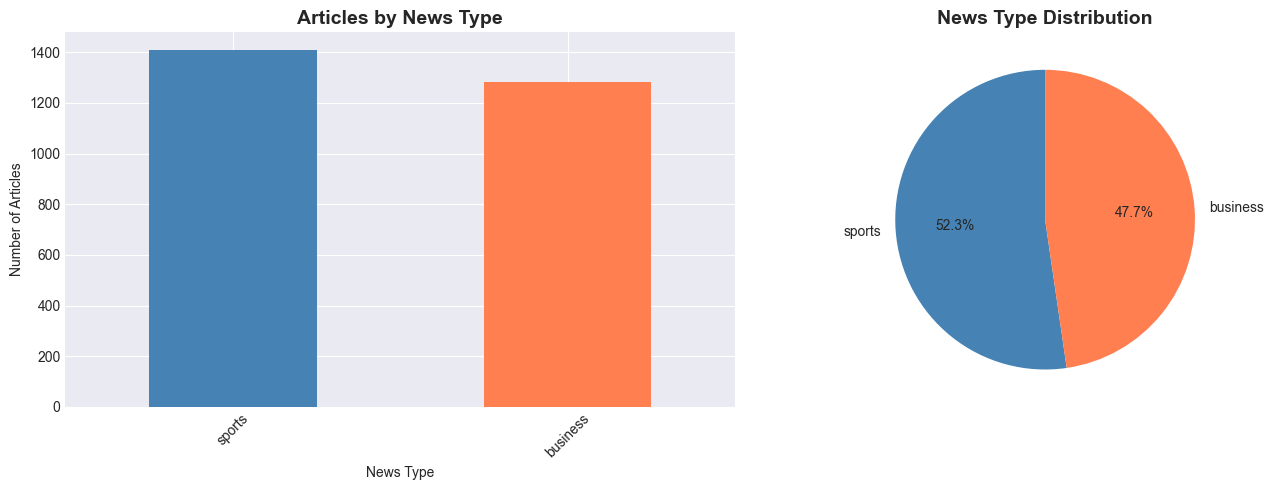

In [6]:
print("\n" + "="*60)
print("NEWS TYPE DISTRIBUTION")
print("="*60)

category_counts = df['NewsType'].value_counts()
print(category_counts)
print(f"\nPercentage distribution:")
print((category_counts / len(df) * 100).round(2))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
category_counts.plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'])
axes[0].set_title('Articles by News Type', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Articles')
axes[0].set_xlabel('News Type')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
            startangle=90, colors=['steelblue', 'coral'])
axes[1].set_title('News Type Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


ARTICLE LENGTH STATISTICS

Character Length Statistics:
count     2692.000000
mean      1810.019688
std       1080.292897
min        216.000000
25%       1032.750000
50%       1647.500000
75%       2325.250000
max      19199.000000
Name: article_length, dtype: float64

Word Count Statistics:
count    2692.000000
mean      291.274889
std       173.758439
min        32.000000
25%       166.000000
50%       263.500000
75%       381.000000
max      3051.000000
Name: word_count, dtype: float64


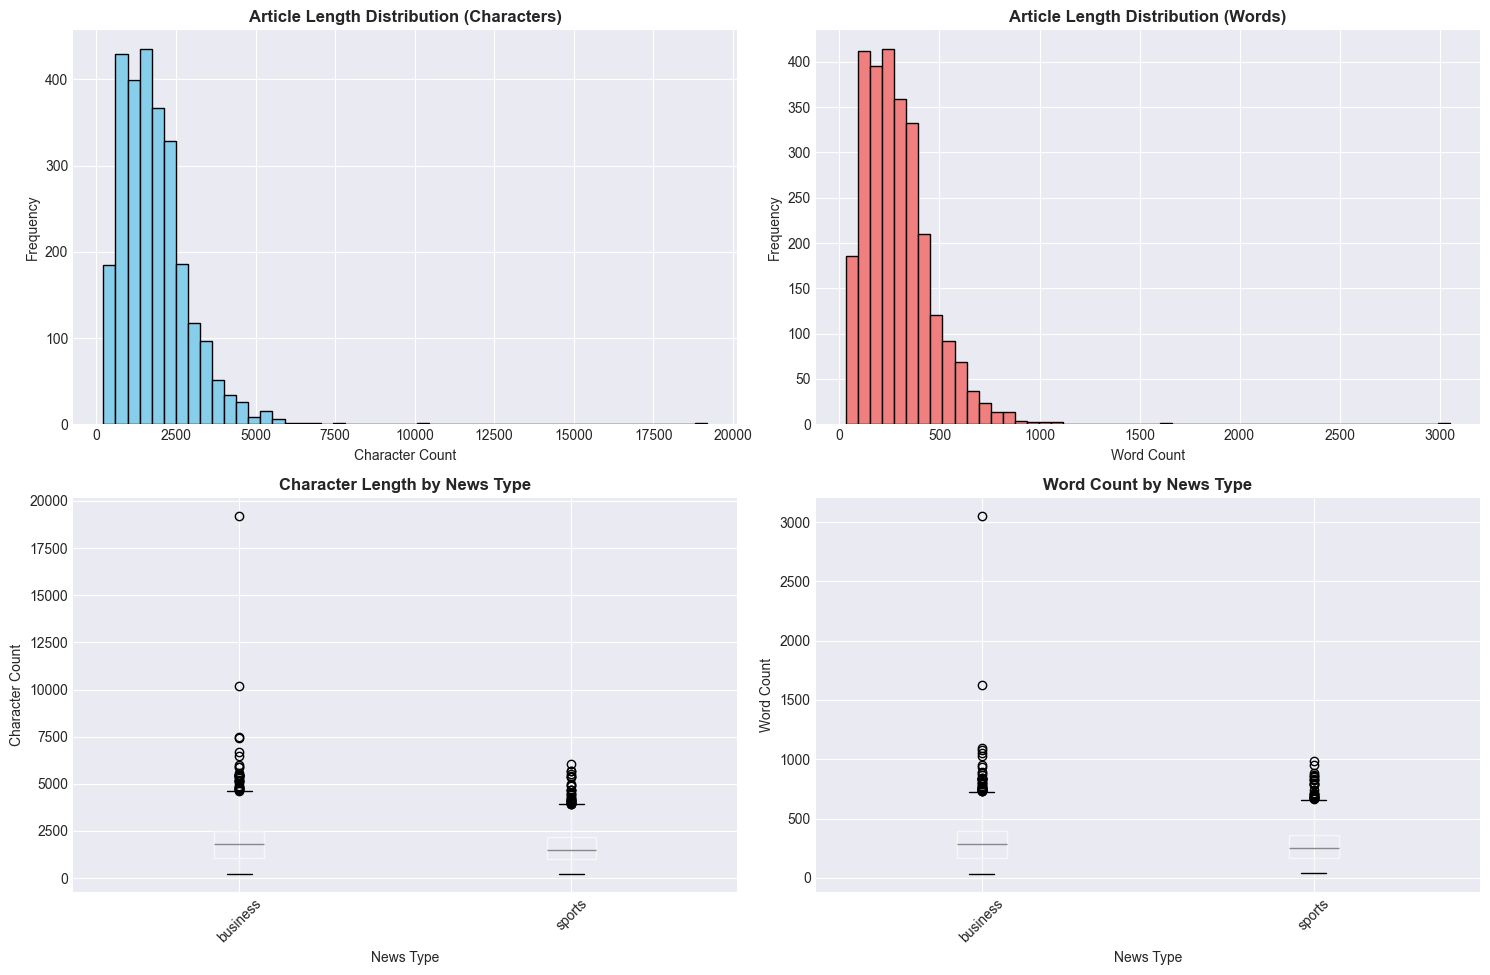

In [7]:
# Cell 6: Article Length Analysis
print("\n" + "="*60)
print("ARTICLE LENGTH STATISTICS")
print("="*60)

# Calculate article lengths (character count)
df['article_length'] = df['Article'].astype(str).apply(len)
df['word_count'] = df['Article'].astype(str).apply(lambda x: len(x.split()))

print("\nCharacter Length Statistics:")
print(df['article_length'].describe())

print("\nWord Count Statistics:")
print(df['word_count'].describe())

# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Character length distribution
axes[0, 0].hist(df['article_length'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Article Length Distribution (Characters)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')

# Word count distribution
axes[0, 1].hist(df['word_count'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Article Length Distribution (Words)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')

# Box plot by category - character length
df.boxplot(column='article_length', by='NewsType', ax=axes[1, 0])
axes[1, 0].set_title('Character Length by News Type', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('News Type')
axes[1, 0].set_ylabel('Character Count')
plt.sca(axes[1, 0])
plt.xticks(rotation=45)

# Box plot by category - word count
df.boxplot(column='word_count', by='NewsType', ax=axes[1, 1])
axes[1, 1].set_title('Word Count by News Type', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('News Type')
axes[1, 1].set_ylabel('Word Count')
plt.sca(axes[1, 1])
plt.xticks(rotation=45)

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()


In [9]:
# Heading Length Analysis
print("\n" + "="*60)
print("HEADING LENGTH STATISTICS")
print("="*60)

df['heading_length'] = df['Heading'].astype(str).apply(len)
df['heading_word_count'] = df['Heading'].astype(str).apply(lambda x: len(x.split()))

print("\nHeading Character Length:")
print(df['heading_length'].describe())

print("\nHeading Word Count:")
print(df['heading_word_count'].describe())



HEADING LENGTH STATISTICS

Heading Character Length:
count    2692.000000
mean       47.109955
std         9.797342
min        14.000000
25%        41.000000
50%        47.000000
75%        53.000000
max       102.000000
Name: heading_length, dtype: float64

Heading Word Count:
count    2692.000000
mean        8.131501
std         1.786386
min         3.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        19.000000
Name: heading_word_count, dtype: float64



DATE ANALYSIS
Date Range: 2015-01-01 00:00:00 to 2017-03-27 00:00:00
Total Days: 816

Articles per Year:
Year
2015     411
2016    2164
2017     117
Name: count, dtype: int64


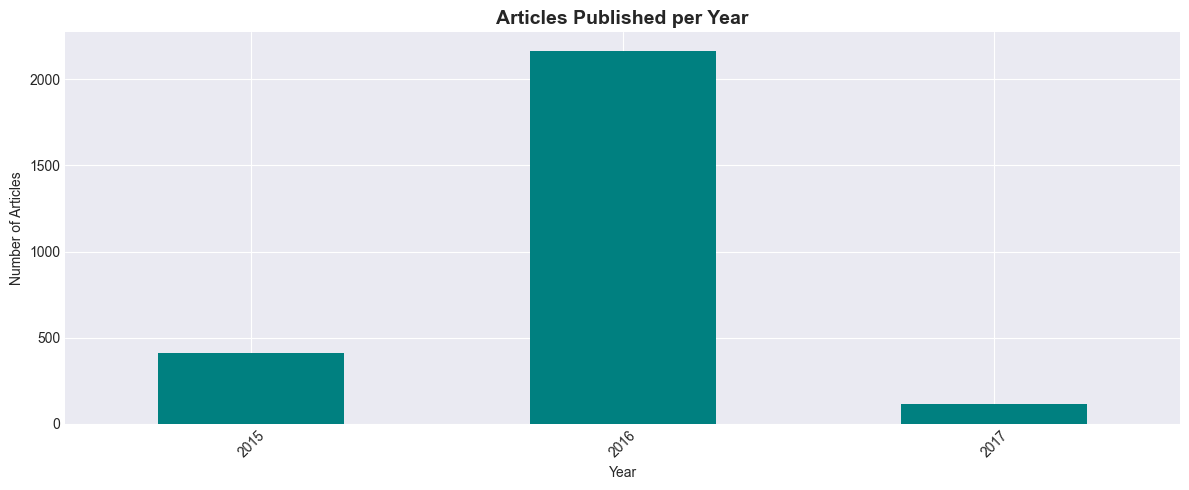

In [10]:
# : Date Analysis
# """
print("\n" + "="*60)
print("DATE ANALYSIS")
print("="*60)

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total Days: {(df['Date'].max() - df['Date'].min()).days}")

# Articles per year
df['Year'] = df['Date'].dt.year
year_counts = df['Year'].value_counts().sort_index()

print("\nArticles per Year:")
print(year_counts)

# Visualize
plt.figure(figsize=(12, 5))
year_counts.plot(kind='bar', color='teal')
plt.title('Articles Published per Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
 # Sample Articles
# """
print("\n" + "="*60)
print("SAMPLE ARTICLES")
print("="*60)

# Show sample from each category
for category in df['NewsType'].unique():
    print(f"\n{'='*60}")
    print(f"Category: {category.upper()}")
    print('='*60)
    
    sample = df[df['NewsType'] == category].sample(1).iloc[0]
    print(f"\nHeading: {sample['Heading']}")
    print(f"Date: {sample['Date']}")
    print(f"Article Preview: {sample['Article'][:300]}...")
    print(f"Word Count: {sample['word_count']}")



SAMPLE ARTICLES

Category: BUSINESS

Heading: Pakistan Jewellary exports up 29 FY16
Date: 2016-08-01 00:00:00
Article Preview: strong>ISLAMABAD: The Jewellary exports from the country increased by 28.78 percent during the fiscal year 2015 16 compared to the corresponding period of last year.</strongThe overall exports of jewellary from the country during July June (2015 16) were recorded at 8.492 million compared to the exp...
Word Count: 263

Category: SPORTS

Heading: India put Windies under pressure despite Blackwood
Date: 2016-07-30 00:00:00
Article Preview: KINGSTON, Jamaica: Jermaine Blackwood smashed an entertaining counter-attacking half-century but India held the upper hand in reducing the West Indies to 88 for four at lunch on the opening day of the second Test in Kingston on Saturday.Blackwood, who was in danger of being dropped after a double fa...
Word Count: 384


In [12]:
# Cell 10: Text Quality Check
# """
print("\n" + "="*60)
print("TEXT QUALITY CHECK")
print("="*60)

# Check for very short articles (potential data quality issues)
short_articles = df[df['word_count'] < 50]
print(f"Articles with < 50 words: {len(short_articles)} ({len(short_articles)/len(df)*100:.2f}%)")

# Check for very long articles
long_articles = df[df['word_count'] > 1000]
print(f"Articles with > 1000 words: {len(long_articles)} ({len(long_articles)/len(df)*100:.2f}%)")

# Check for duplicates
duplicates = df.duplicated(subset=['Article']).sum()
print(f"Duplicate articles: {duplicates} ({duplicates/len(df)*100:.2f}%)")



TEXT QUALITY CHECK
Articles with < 50 words: 14 (0.52%)
Articles with > 1000 words: 6 (0.22%)
Duplicate articles: 108 (4.01%)


In [15]:
# Summary Statistics Table
#
print("\n" + "="*60)
print("SUMMARY BY CATEGORY")
print("="*60)

summary = df.groupby('NewsType').agg({
    'Article': 'count',
    'word_count': ['mean', 'median', 'min', 'max'],
    'article_length': ['mean', 'median']
}).round(2)

print(summary)



SUMMARY BY CATEGORY
         Article word_count                  article_length        
           count       mean median min   max           mean  median
NewsType                                                           
business    1284     303.23  282.0  32  3051        1933.89  1785.5
sports      1408     280.37  251.0  43   986        1697.06  1509.0


In [16]:
print("\n" + "="*60)
print("KEY FINDINGS")
print("="*60)
print("""
1. Dataset contains {:,} news articles from {} categories
2. Date range: {} to {}
3. Average article length: {:.0f} words
4. No missing values in critical columns
5. Categories are {} balanced

NEXT STEPS:
✓ Text preprocessing (tokenization, cleaning, stopword removal)
✓ Build inverted index for Boolean retrieval
✓ Implement TF-IDF vectorization
✓ Implement BM25 scoring
✓ Design evaluation queries
""".format(
    len(df),
    df['NewsType'].nunique(),
    df['Date'].min().strftime('%Y-%m-%d'),
    df['Date'].max().strftime('%Y-%m-%d'),
    df['word_count'].mean(),
    'well' if df['NewsType'].value_counts().std() < df['NewsType'].value_counts().mean() * 0.3 else 'not'
))

print("="*60)
print("✅ Data exploration complete!")
print("="*60)


KEY FINDINGS

1. Dataset contains 2,692 news articles from 2 categories
2. Date range: 2015-01-01 to 2017-03-27
3. Average article length: 291 words
4. No missing values in critical columns
5. Categories are well balanced

NEXT STEPS:
✓ Text preprocessing (tokenization, cleaning, stopword removal)
✓ Build inverted index for Boolean retrieval
✓ Implement TF-IDF vectorization
✓ Implement BM25 scoring
✓ Design evaluation queries

✅ Data exploration complete!
